In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

## Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
# Load data
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
# Build 15-minute counts dataframe and replace nan values with zero
logins.set_index('login_time', inplace=True)
logins['Counts'] = 1
logins = (1*logins.resample('15T').sum()).fillna(0)
logins.head(10)

,Counts
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0
1970-01-01 21:15:00,4.0
1970-01-01 21:30:00,0.0
1970-01-01 21:45:00,4.0
1970-01-01 22:00:00,9.0


In [4]:
# Observe the last date of this dataset
logins.tail()

,Counts
login_time,
1970-04-13 17:45:00,5.0
1970-04-13 18:00:00,5.0
1970-04-13 18:15:00,2.0
1970-04-13 18:30:00,7.0
1970-04-13 18:45:00,6.0


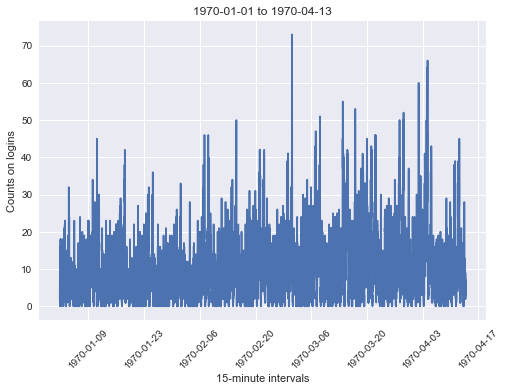

In [5]:
# Visualize the 15-minute interval counts for the whole date range
plt.plot(logins)
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('1970-01-01 to 1970-04-13')

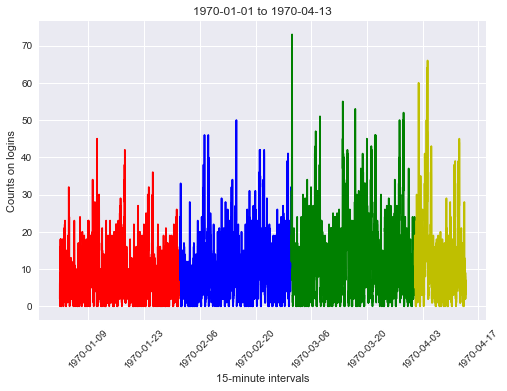

In [6]:
# Visualize the 15-minute interval counts for the whole date range 
# and color different months in different colors
plt.title('1970-01-01 to 1970-04-13')
plt.plot(logins['1970-01-01': '1970-01-31'], 'r')
plt.plot(logins['1970-02-01': '1970-02-28'], 'b')
plt.plot(logins['1970-03-01': '1970-03-31'], 'g')
plt.plot(logins['1970-04-01': '1970-04-13'], 'y')
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')

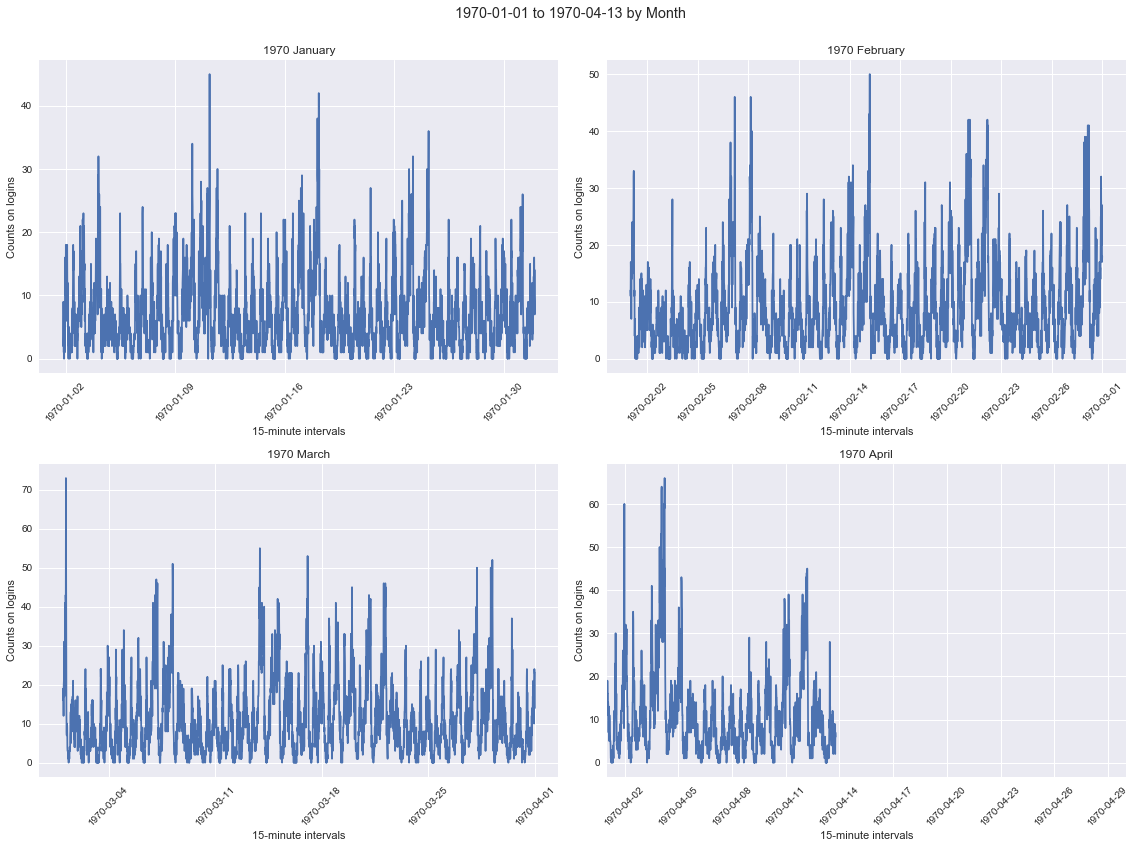

In [7]:
# # Visualize the 15-minute interval counts for each month
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16, 12)
plt.suptitle('1970-01-01 to 1970-04-13 by Month')

plt.subplot(2, 2, 1)
plt.plot(logins['1970-01-01': '1970-01-31'])
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('1970 January')

plt.subplot(2, 2, 2)
plt.plot(logins['1970-02-01': '1970-02-28'])
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('1970 February')

plt.subplot(2, 2, 3)
plt.plot(logins['1970-03-01': '1970-03-31'])
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('1970 March')

plt.subplot(2, 2, 4)
plt.plot(logins['1970-04-01': '1970-04-13'])
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.xlim('1970-04-01', '1970-04-30')
plt.title('1970 April')

plt.tight_layout(rect=[0, 0, 1, 0.95])

In [8]:
logins['weekday'] = logins.index.weekday

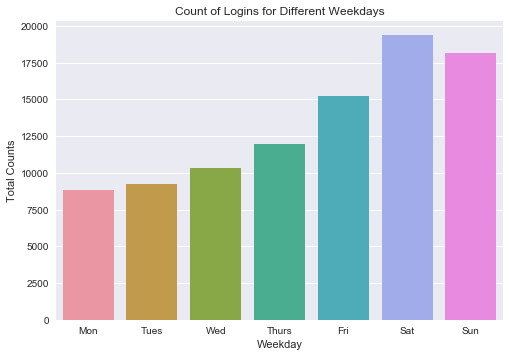

In [9]:
# Visualize the total counts for different weekdays
wkday_count = logins.groupby('weekday').sum()
wkday_count.index = ['Mon', 'Tues', 'Wed','Thurs','Fri', 'Sat', 'Sun']
sns.barplot(x='index', y='Counts', data=wkday_count.reset_index())
plt.ylabel('Total Counts')
plt.xlabel('Weekday')
plt.title('Count of Logins for Different Weekdays')

In [12]:
logins['hour'] = logins.index.hour

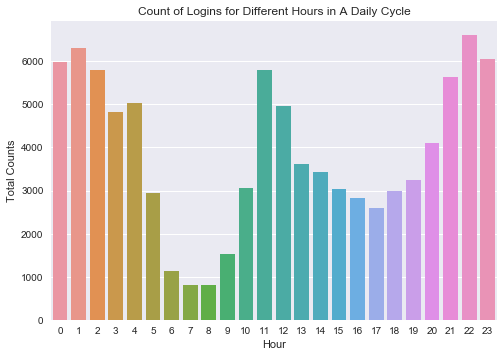

In [21]:
# Visualize the total counts for different daily hours
hour_count = logins.drop('weekday', axis=1).groupby('hour').sum()
sns.barplot(x='hour', y='Counts', data=hour_count.reset_index())
plt.ylabel('Total Counts')
plt.xlabel('Hour')
plt.title('Count of Logins for Different Hours in A Daily Cycle')

The first three plots above visualize the login counts in 15-minute interval in the range of 1970-1-1 to 1970-04-13 and in each month. From the first three plots, it can be seen that the login counts in 15-minute interval fluctuates a lot but there seems to be a pattern in this fluctuation and that login counts of a month tend to be higher and higher comparing with the counts last month. 

Then the last two plots above visualize total counts for different weekdays and hours in the range of 1970-1-1 to 1970-04-13. From the different weekdays plot, it is shown that login counts are higher in weekends and from Monday to Friday the counts are higher than the former day. From the different hours plot, it is shown that early morning between 6 am and 9 am have much less login counts, then there is a peak during lunch hours, and the highest peak comes at night between 9 pm and 2 am. 

## Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: 
    * how you will implement the experiment 
    * what statistical test(s) you will conduct to verify the significance of theobservation 
    * how you would interpret the results and provide recommendations to the city operations team along with any caveats.

### Solution: 
1. The key measure of success I would choose in this experiment is number of times driver partners cross the bridge in a week because if reimbursing all toll costs does encourage driver partners to be available in both cities, then the times that driver parters cross the bridge should increase, which also indicates that more drivers are available in both cities. I choose this metric because it is intuitive for understanding and easy to apply statistical tests. <br/><br/>

2. I would randomly record a group of more than 30 driver partners' number of times crossed the bridge before and after the action of reimbursing toll costs happens. 
   <br/><br/>I would then use a 1-sample z statistic test to verify the significance of the observation with null hypothesis being there is no difference in the number of times driver partners crossing the bridge before and after the action of toll cost reimbursement.I would calculate the z-score and then use a 95% confidence interval to determine whether or not the null hypothesis should be rejected. 
  <br/><br/>If te null hypothesis is rejected, then it indicates that there could be a difference before and after the action and I would recommend that the company continue to reimburse toll costs and continue observing the number of times drivers are crossing the bridge. If it is not rejected, then the city operation teams might need to come up with other solutions that could encourage driver partners to be available in both cities. 

## Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

### Data description
* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYYMMDD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [122]:
# Load data
data = json.load(open('ultimate_data_challenge.json'))
df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [5]:
# Check if there is any null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [123]:
# Convert time series indicated data to their proper type
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [124]:
# Create the target variable
last_day = max(df['last_trip_date'])
days = pd.date_range(end=last_day, periods=30, freq='D')
df['user_situation'] = df['last_trip_date'].map(lambda x:'active' if x in days else 'inactive')

In [102]:
# Calculate percentage of retained users
percent = len(df[df.user_situation == 'active']) / len(df)
print('The fraction of the observed retained users is: %.4f' %percent)

The fraction of the observed retained users is: 0.3662


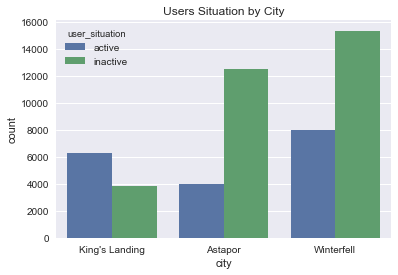

In [56]:
sns.countplot(x='city', hue='user_situation', data=df)
plt.title('Users Situation by City')

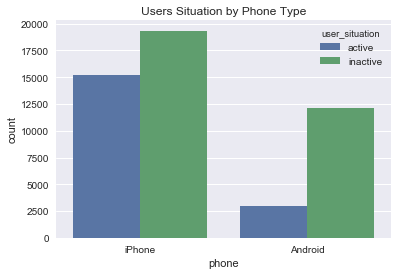

In [57]:
sns.countplot(x='phone', hue='user_situation', data=df)
plt.title('Users Situation by Phone Type')

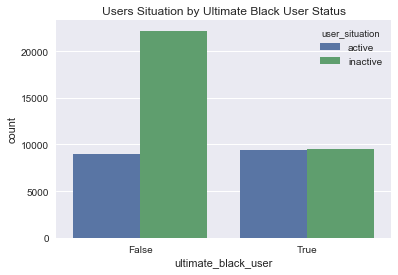

In [63]:
sns.countplot(x='ultimate_black_user', hue='user_situation', data=df)
plt.title('Users Situation by Ultimate Black User Status')

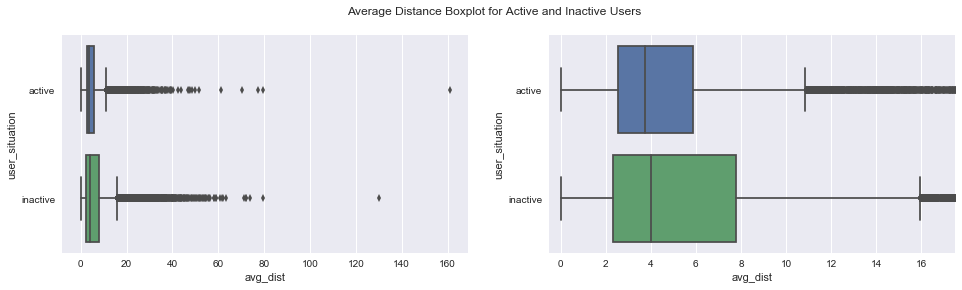

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16, 4)
plt.suptitle('Average Distance Boxplot for Active and Inactive Users')
plt.subplot(1, 2, 1)
sns.boxplot(x='avg_dist', y='user_situation', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='avg_dist', y='user_situation', data=df)
plt.xlim(-0.5, 17.5);

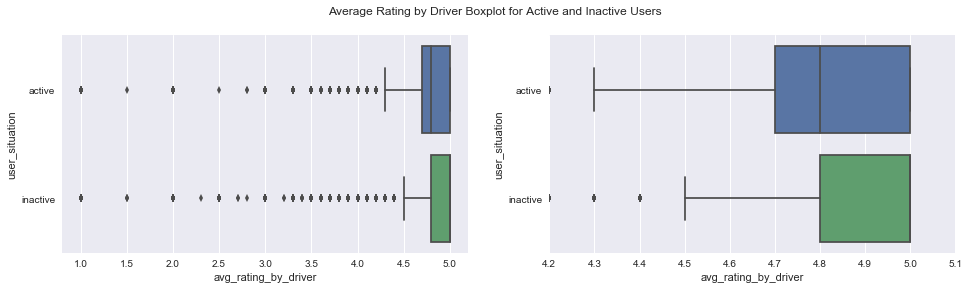

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16, 4)
plt.suptitle('Average Rating by Driver Boxplot for Active and Inactive Users')
plt.subplot(1, 2, 1)
sns.boxplot(x='avg_rating_by_driver', y='user_situation', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='avg_rating_by_driver', y='user_situation', data=df)
plt.xlim(4.2, 5.1);

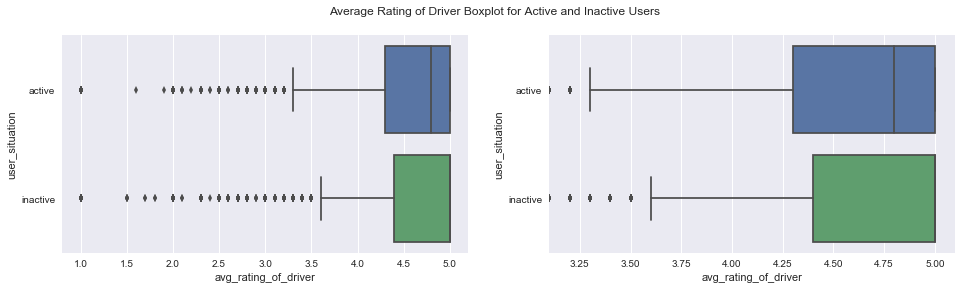

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16, 4)
plt.suptitle('Average Rating of Driver Boxplot for Active and Inactive Users')
plt.subplot(1, 2, 1)
sns.boxplot(x='avg_rating_of_driver', y='user_situation', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='avg_rating_of_driver', y='user_situation', data=df)
plt.xlim(3.1, 5.1);

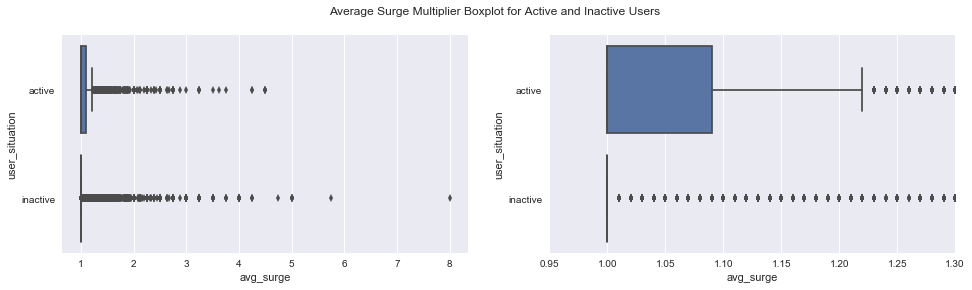

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16, 4)
plt.suptitle('Average Surge Multiplier Boxplot for Active and Inactive Users')
plt.subplot(1, 2, 1)
sns.boxplot(x='avg_surge', y='user_situation', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='avg_surge', y='user_situation', data=df)
plt.xlim(0.95, 1.3);

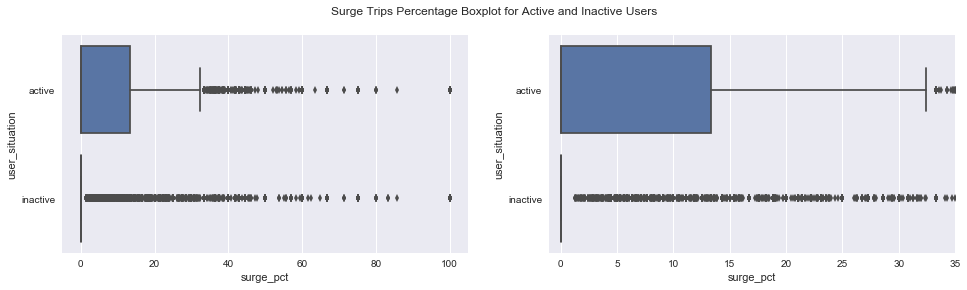

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16, 4)
plt.suptitle('Surge Trips Percentage Boxplot for Active and Inactive Users')
plt.subplot(1, 2, 1)
sns.boxplot(x='surge_pct', y='user_situation', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='surge_pct', y='user_situation', data=df)
plt.xlim(-1, 35);

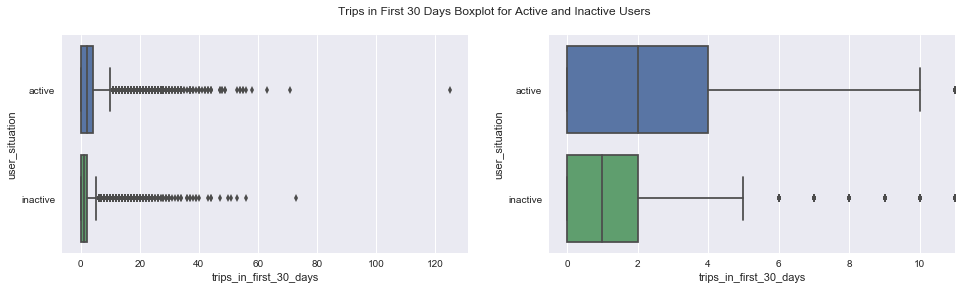

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16, 4)
plt.suptitle('Trips in First 30 Days Boxplot for Active and Inactive Users')
plt.subplot(1, 2, 1)
sns.boxplot(x='trips_in_first_30_days', y='user_situation', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='trips_in_first_30_days', y='user_situation', data=df)
plt.xlim(-0.5, 11);

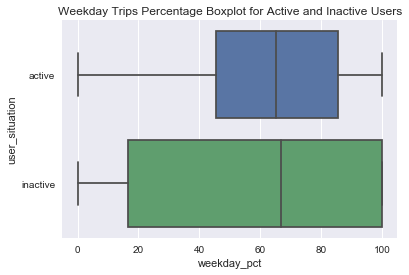

In [89]:
plt.title('Weekday Trips Percentage Boxplot for Active and Inactive Users')
sns.boxplot(x='weekday_pct', y='user_situation', data=df)

In [125]:
# Convert target variable type
df.user_situation = (df.user_situation == 'active').astype(int)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,user_situation
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [126]:
# Fill null values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

In [135]:
# Convert categorical variables
city = pd.get_dummies(df.city, drop_first=True)
phone = pd.get_dummies(df.phone, drop_first=True)
df.ultimate_black_user = (df.ultimate_black_user).astype(int)
df.drop(['last_trip_date', 'signup_date', 'city', 'phone'], axis=1, inplace=True)
df = df.join([city, phone])
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,user_situation,King's Landing,Winterfell,iPhone
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,1,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,1,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0,0,1,0


In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [139]:
# Split data
X = np.array(df.drop('user_situation', axis=1))
y = np.array(df.user_situation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [140]:
# Normalize data
scaler = StandardScaler()
scaler.fit(X_train) # use train data to fit
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [181]:
model1 = LogisticRegression(class_weight='balanced')
model1.fit(X_train, y_train)
print(classification_report(y_true=y_test, y_pred=model1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.79      0.72      0.75      6234
        yes       0.60      0.67      0.63      3766

avg / total       0.71      0.70      0.71     10000



In [194]:
# Present features importance by their corresponding coefficients in logistic regression
features = pd.DataFrame(df.drop('user_situation', axis=1).columns, columns=['features'])
coefficients = pd.DataFrame(abs(model1.coef_)).unstack().unstack()
results = pd.concat([features, coefficients], axis=1)
results.columns = ['features', 'coefficients']
results.sort_values(by='coefficients')

,features,coefficients
3,avg_surge,0.005154
4,surge_pct,0.012250
2,avg_rating_of_driver,0.014702
7,weekday_pct,0.016174
9,Winterfell,0.016269
1,avg_rating_by_driver,0.030004
0,avg_dist,0.078075
6,ultimate_black_user,0.187783
5,trips_in_first_30_days,0.196437
10,iPhone,0.212077


In [180]:
model2 = KNeighborsClassifier(leaf_size=10)
model2.fit(X_train, y_train)
print(classification_report(y_true=y_test, y_pred=model2.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.79      0.82      0.80      6234
        yes       0.68      0.63      0.66      3766

avg / total       0.75      0.75      0.75     10000



In [196]:
# Use gridsearch for tuning parameters
model3 = GradientBoostingClassifier()
parameters = {'learning_rate':[0.1, 0.2, 0.25], 'n_estimators':[150, 200, 250]}
clf = GridSearchCV(model3, parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_#, clf.cv_results_['params'], clf.cv_results_['mean_test_score']

{'learning_rate': 0.2, 'n_estimators': 200}

In [197]:
model3 = GradientBoostingClassifier(learning_rate=0.2, n_estimators=200)
model3.fit(X_train, y_train)
print(classification_report(y_true=y_test, y_pred=model3.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.81      0.87      0.84      6234
        yes       0.75      0.66      0.70      3766

avg / total       0.79      0.79      0.79     10000



#### Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

From all above, I would choose gradient boosting classifier as my approach. I also considered two alternative models: Logistic Regression and K-Nearest Neighbors to compare. These three models are quite different in the way they compute. Logistic regression is a great way to look at which features take important roles in deciding the output and which do not. KNN is a simple model that can be used when data is not very large. Gradient boosting claasifier ins an ensemble of decision trees and it correct errors based on the previous tree's results. One concern I would have is that gradient boosting is a bit easy to overfit. Having more data or regularize more could solve this problem. I use classification report, which shows precision, recall and f1 score, to validate the models. From the scores it is clear that gradient boosting classifier performs best among the three. F1 score is taken as the key indicator of model performance as it is the harmonic mean of precision and recall. Because the data has only 36% positive entries, more attention is focused on the improvement of f1 score for 'yes'. 

#### Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

Based on logistic regression the three most important features are whether the user is in King's Landing, whether the user uses an iPhone and how many trips did the user have in first 30 days. Ultimate could investigate what are the important parts in King's landing's service that made users in King's Landing have a higher possibility to retain and make improvement based on the investigation results in other area. In the same way, Ultimate should consider whether there are some difference in the users' experience of the apps for iPhone and Andriod that makes this become an important feature on whether the users have retained. Ultimate should also consider ways to incentive users early after their signup date to retain the users. 
Also, Ultimate could use gradient boosting to predict whether a new user would likely to be retained and focus more on marketing for users who predicted would be retained. 